In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import tensorflow as tf

In [3]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, Convolution2D, MaxPool2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [5]:
train_dir = 'C:/Users/bha38/BalajiHA/Projects/Learning/Udemy/DataScience/datasets/NitrogenDeficiencyImage/Training'
test_dir = 'C:/Users/bha38/BalajiHA/Projects/Learning/Udemy/DataScience/datasets/NitrogenDeficiencyImage/Test'

In [6]:
img_swap1_name0 = 'SWAP_TR1_001.jpg'
img = plt.imread(train_dir+'/swap1/'+img_swap1_name0)
img.shape

(100, 100, 3)

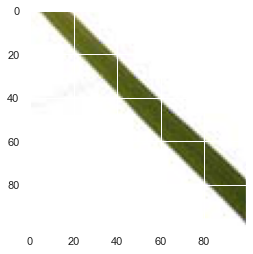

In [7]:
plt.imshow(img)
plt.show()

In [8]:
img.max(), img.min()

(255, 3)

In [9]:
data_gen0 = ImageDataGenerator(
    rescale=1/255.
)

In [10]:
target_size = (100, 100)
batch_size = 32

In [11]:
train_data_gen0 = data_gen0.flow_from_directory(
    train_dir,
    target_size=target_size,
    batch_size=batch_size,
    shuffle=True,
    seed=33,
    subset='training'
)

Found 5276 images belonging to 4 classes.


In [12]:
test_data_gen0 = data_gen0.flow_from_directory(
    test_dir,
    target_size=target_size,
    batch_size=batch_size,
    shuffle=True,
    seed=33,
    subset='training'
)

Found 400 images belonging to 4 classes.


In [14]:
# target is 4 classes and one hot encoded already

In [15]:
# balancing dataset


In [27]:
target = []
train_batch_size = len(train_data_gen0)
train_batch_size
last_train_batch_images = train_data_gen0[164][0].shape[0]
last_train_batch_images
for i in range(train_batch_size):
    max_images = batch_size
    if (i == 164):
        max_images = last_train_batch_images
    for j in range(max_images):
        target.append(np.argmax(train_data_gen0[i][1][j]))
len(target)

5276

C:\Users\bha38\Anaconda3\envs\ml_reinforcement\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


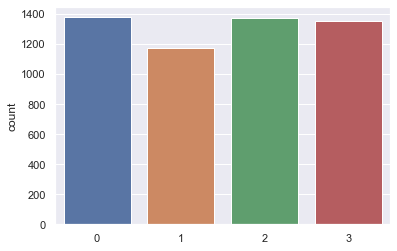

In [28]:
sns.countplot(target)
plt.show()

In [29]:
np.unique(target, return_counts=True)

(array([0, 1, 2, 3], dtype=int64),
 array([1379, 1173, 1372, 1352], dtype=int64))

In [30]:
# the data is balanced as the number of images for each class are almost equal and in the range of 1300

In [31]:
# shuffling is already done with ImageDataGenerator and flow_from_directory
# scaling is already done with ImageDataGenerator

In [32]:
input_size = (100, 100, 3)
output_size = 4

In [33]:
# modelling
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(8,8), input_shape=input_size, activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=32, kernel_size=(4,4), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=32, kernel_size=(2,2), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(256, activation='relu'))

model.add(Dense(output_size, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 93, 93, 32)        6176      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 46, 46, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 43, 43, 32)        16416     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 21, 21, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 20, 20, 32)        4128      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 10, 10, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 3200)              0

In [34]:

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [35]:
early_stop = EarlyStopping(patience=2)
max_epochs = 100

model.fit(train_data_gen0, epochs = max_epochs, callbacks=[early_stop], validation_data=test_data_gen0, verbose=2)

Epoch 1/100
165/165 - 203s - loss: 0.6079 - accuracy: 0.7392 - val_loss: 0.1931 - val_accuracy: 0.9275
Epoch 2/100
165/165 - 101s - loss: 0.1999 - accuracy: 0.9272 - val_loss: 0.1686 - val_accuracy: 0.9300
Epoch 3/100
165/165 - 104s - loss: 0.1171 - accuracy: 0.9581 - val_loss: 0.0803 - val_accuracy: 0.9625
Epoch 4/100
165/165 - 102s - loss: 0.0768 - accuracy: 0.9719 - val_loss: 0.3083 - val_accuracy: 0.9025
Epoch 5/100
165/165 - 118s - loss: 0.0832 - accuracy: 0.9685 - val_loss: 0.0695 - val_accuracy: 0.9725
Epoch 6/100
165/165 - 95s - loss: 0.0528 - accuracy: 0.9799 - val_loss: 0.0389 - val_accuracy: 0.9875
Epoch 7/100
165/165 - 92s - loss: 0.0244 - accuracy: 0.9913 - val_loss: 0.0206 - val_accuracy: 0.9950
Epoch 8/100
165/165 - 98s - loss: 0.0133 - accuracy: 0.9960 - val_loss: 0.0136 - val_accuracy: 0.9950
Epoch 9/100
165/165 - 102s - loss: 0.0485 - accuracy: 0.9843 - val_loss: 0.0279 - val_accuracy: 0.9850
Epoch 10/100
165/165 - 107s - loss: 0.0228 - accuracy: 0.9915 - val_loss: 0.

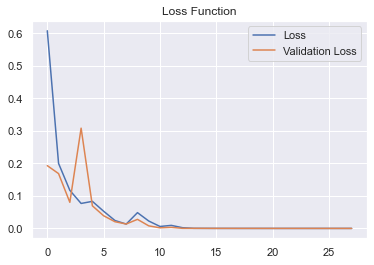

In [36]:
plt.plot(model.history.history['loss'], label='Loss')
plt.plot(model.history.history['val_loss'], label='Validation Loss')
plt.title('Loss Function')
plt.legend(loc='upper right')
plt.show()

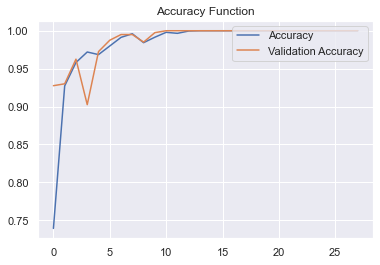

In [37]:
plt.plot(model.history.history['accuracy'], label='Accuracy')
plt.plot(model.history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Function')
plt.legend(loc='upper right')
plt.show()

In [79]:
final_test_dir = 'C:/Users/bha38/BalajiHA/Projects/Learning/Udemy/DataScience/datasets/NitrogenDeficiencyImage/FinalTest'

In [80]:
final_test_data_gen = data_gen0.flow_from_directory(
    final_test_dir,
    target_size=target_size,
    batch_size=batch_size,
    shuffle=True,
    seed=33,
    subset='training'
)

Found 114 images belonging to 4 classes.


In [81]:
def predict_compare(type, do_print):  # type can be train, test, final_test
    ran = np.random.randint(1,32,7)
    if do_print:
        print('ran: ',ran)
    preds_match = []
    if (type == 'train'):
        for i in range(len(ran)):
            if do_print: 
                print('For image ', ran[i])
            pred = model.predict(train_data_gen0[0][0][ran[i]].reshape(1,100,100,3)) 
            if do_print: 
                print(pred)
            pred_no = np.argmax(pred)
            if do_print:
                print(pred_no)
                print(train_data_gen0[0][1][ran[i]])
                print(np.argmax(train_data_gen0[0][1][ran[i]]))
            preds_match.append(np.argmax(train_data_gen0[0][1][ran[i]]) == pred_no)
    elif (type == 'test'):
        for i in range(len(ran)):
            if do_print:
                print('For image ', ran[i])
            pred = model.predict(test_data_gen0[0][0][ran[i]].reshape(1,100,100,3)) 
            if do_print:
                print(pred)
            pred_no = np.argmax(pred)
            if do_print:
                print(pred_no)
                print(test_data_gen0[0][1][ran[i]])
                print(np.argmax(test_data_gen0[0][1][ran[i]]))
            preds_match.append(np.argmax(test_data_gen0[0][1][ran[i]]) == pred_no)        
    elif (type == 'final test'):
        for i in range(len(ran)):
            if do_print:
                print('For image ', ran[i])
            pred = model.predict(final_test_data_gen[0][0][ran[i]].reshape(1,100,100,3)) 
            if do_print:
                print(pred)
            pred_no = np.argmax(pred)
            if do_print:
                print(pred_no)
                print(final_test_data_gen[0][1][ran[i]])
                print(np.argmax(final_test_data_gen[0][1][ran[i]]))
            preds_match.append(np.argmax(final_test_data_gen[0][1][ran[i]]) == pred_no)        
    return preds_match

In [82]:
preds = predict_compare('train', False)
#print(preds)
#print(preds.count(True))
#print(len(preds))
accur = np.round(100*(preds.count(True)/len(preds)))
print('Predictions comparison for train data with accuracy: ', accur)

Predictions comparison for train data with accuracy:  100.0


In [83]:
preds = predict_compare('test', False)
#print(preds)
accur = np.round(100*(preds.count(True)/len(preds)))
print('Predictions comparison for test data with accuracy: ', accur)

Predictions comparison for test data with accuracy:  100.0


In [84]:
# great, able to get 100% accuracy while predicting
preds = predict_compare('final test', False)
#print(preds)
accur = np.round(100*(preds.count(True)/len(preds)))
print('Predictions comparison for final test data not seen by the model with accuracy: ', accur)

Predictions comparison for final test data not seen by the model with accuracy:  100.0


In [85]:
total_batches = len(test_data_gen0)
last_batch_images = (test_data_gen0[12][0].shape[0])
total_batches, last_batch_images

(13, 16)

In [86]:
matching_count = 0
total_count = (total_batches-1)*batch_size + last_batch_images
#print('total_count: ', total_count)
for i in range(total_batches):
    max_images = batch_size
    if (i == 12):
        max_images = last_batch_images
    for j in range(max_images):
        target = np.argmax(test_data_gen0[i][1][j])
        #print('Target: ', target)
        pred = model.predict(test_data_gen0[i][0][j].reshape(1,100,100,3))
        #print('pred: ', pred)
        pred_no = np.argmax(pred)
        #print('Prediction: ',pred_no)
        if (target == pred_no):
            matching_count += 1
        #print('matching_count: ', matching_count)

print('Accuracy for Test dataset: ', np.round(100*matching_count/total_count))  

Accuracy for Test dataset:  100.0
